In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [104]:
def equalise_histogram(img, elements, frequency):
    
    cumu_freq = np.zeros((len(frequency),),dtype=int)
    output = np.zeros((len(frequency),),dtype=int)
    
    levels = len(frequency) -1
    size = img.width * img.height
    
    cumu_freq[0]= frequency[0]
    val = round((levels/size)* cumu_freq[0])
    output[0] = val
    
    for i in range(1,len(frequency)):
        cumu_freq[i]= frequency[i] + cumu_freq[i-1]
        val = round((levels/size)* cumu_freq[i])
        output[i] = val
    
    w,h = img.size
    pixelmap = img.load()
    
    for i in range(0,w):
        for j in range(0,h):
            val = pixelmap[i,j]
            index = elements.index(val)
            pixelmap[i,j] = elements[output[index]]
    plt.imshow(img, cmap='gray') 
    plt.yticks([])
    plt.xticks([])
    plt.show()    
    return img,output         
    

In [60]:
def normal_histogram(img):    
    pixelmap = list(img.getdata())
    elements = list(set(pixelmap))
    frequency = np.zeros((len(elements),),dtype=int)
  
    for i in range(len(elements)):   
        val = pixelmap.count(elements[i])
        frequency[i] = val
    
    frequency= list(frequency)
    
    return elements, frequency

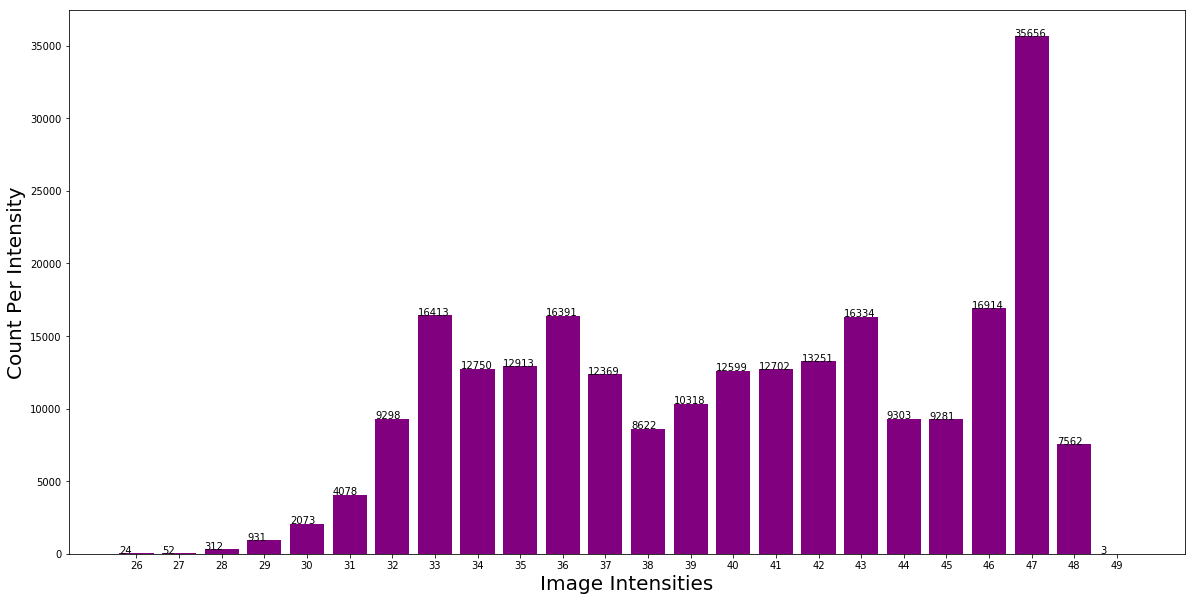

In [105]:
image = Image.open('../Sphinx.png')
img_copy = image.copy()

elements, normal_vector = normal_histogram(img_copy)

figure, axes = plt.subplots(figsize=(20, 10))

axes.bar(elements,normal_vector, width=0.8, tick_label = elements, color= 'purple')
axes.set_ylabel('Count Per Intensity',size=20)
axes.set_xlabel('Image Intensities', size=20)
for i, v in enumerate(normal_vector):
      plt.text(elements[i]-0.4, v+0.01, str(v))


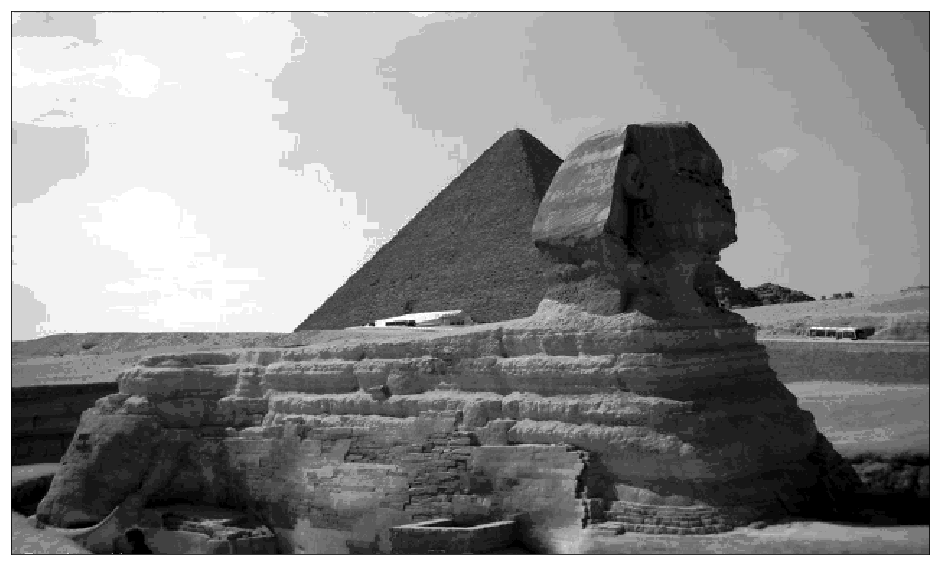

In [106]:
equalised_img, equalised_vector = equalise_histogram(img_copy, elements, normal_vector)

In [ ]:
#figure, axes = plt.subplots(figsize=(20, 10))

# axes.bar(elements,normal_vector, width=0.8, tick_label = elements, color= 'purple')
# axes.set_ylabel('Count Per Intensity',size=20)
# axes.set_xlabel('Image Intensities', size=20)
# for i, v in enumerate(normal_vector):
#       plt.text(elements[i]-0.4, v+0.01, str(v))